In [1]:
import pandas as pd
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ls graph1/

graph_edges_dict.pkl                 STRICT_graph_edges_dict.pkl
iclr_arxiv_gid_map.pkl               STRICT_node_venue_labels.pkl
iclr_arxiv_map.pkl                   STRICT_stage0_graph_edges_dict.pkl
iclr_global_id_map_for_t0_nodes.pkl  STRICT_type0_nodes_list.pkl
iclr_ref_arxiv_map.pkl               type0_nodes_list.pkl
level2_nodes_invisible.pkl           type1_nodes_list.pkl
node_venue_labels.pkl                type1_nodes.pkl
stage0_graph_edges_dict.pkl


In [16]:
with open("graph1/stage0_graph_edges_dict.pkl", "rb") as f:
    init_graph = pickle.load(f)

with open("graph1/graph_edges_dict.pkl", "rb") as f:
    graph_edges = pickle.load(f)

with open("graph1/type0_nodes_list.pkl", "rb") as f:
    pure_iclr_nodes = pickle.load(f)

with open("graph1/node_venue_labels.pkl", "rb") as f:
    node_venue_labels = pickle.load(f)

In [10]:
all_nodes = defaultdict(list)
edges_data = []

for k, v in graph_edges.items():
    for i in v:
        if i in node_venue_labels:
            venue = node_venue_labels[i]
        else:
            venue = "unk"
        edges_data.append([k, i, venue])
        if i in pure_iclr_nodes:
            all_nodes[i] = "t0"
        else:
            all_nodes[i] = "t1"
    if k in pure_iclr_nodes:
        all_nodes[k] = "t0"
    else:
        all_nodes[k] = "t1"

In [11]:
edges_data[0]

[1159169, 157588]

In [13]:
df = pd.DataFrame(edges_data, columns=['fid', 'tid', 'etype'])
df.to_csv("sc_edges.csv", sep=",", index=False)

df = pd.DataFrame(all_nodes.items(), columns=["id", "ntype", "dlabel"])
df.to_csv("sc_nodes.csv", sep=",", index=False)

In [15]:
df = pd.DataFrame(edges_data, columns=['fid', 'tid'])
df.to_excel("sc_edges.xlsx", index=False)

df = pd.DataFrame(all_nodes.items(), columns=["id", "type"])
df.to_excel("sc_nodes.xlsx", index=False)

In [6]:
len(graph_edges)

2616

In [9]:
count_nodes_ya = []

for k, v in graph_edges.items():
    if not k in pure_iclr_nodes:
        count_nodes_ya = count_nodes_ya + list(v)
print(len(set(count_nodes_ya)))

1133


In [2]:
with open('graph1/iclr_ref_arxiv_map.pkl', "rb") as f:
    iclr_ref_arxiv_map = pickle.load(f)

with open('graph1/iclr_arxiv_map.pkl', "rb") as f:
    iclr_arxiv_map = pickle.load(f)

with open('graph1/iclr_arxiv_gid_map.pkl', "rb") as f:
    iclr_arxiv_gid_map = pickle.load(f)

In [3]:
reverse_iclr_arxiv_gid_map = defaultdict(list)
for k, v in iclr_arxiv_gid_map.items():
    reverse_iclr_arxiv_gid_map[v].append(k)
len(reverse_iclr_arxiv_gid_map), len(iclr_arxiv_gid_map)

(1711, 1718)

In [4]:
with open("graph1/STRICT_stage0_graph_edges_dict.pkl", "rb") as f:
    st_init_graph = pickle.load(f)

with open("graph1/STRICT_graph_edges_dict.pkl", "rb") as f:
    st_graph_edges = pickle.load(f)

with open("graph1/STRICT_type0_nodes_list.pkl", "rb") as f:
    st_pure_iclr_nodes = pickle.load(f)

with open("graph1/STRICT_node_venue_labels.pkl", "rb") as f:
    st_node_venue_labels = pickle.load(f)

In [5]:
all_nodes = {}
edges_data = []

for k, v in st_graph_edges.items():
    if not k in all_nodes:
        all_nodes[k] = {"dec": "unk", "typ": None}
        
    for i in v:
        if not i in all_nodes:
            all_nodes[i] = {"dec": "unk", "typ": None}
        
        if i in st_node_venue_labels:
            venue = st_node_venue_labels[i]
        elif i in st_pure_iclr_nodes:
            venue = "iclr"
        else:
            venue = "oth"
        edges_data.append([k, i, venue])
        
        if i in st_pure_iclr_nodes:
            all_nodes[i]["typ"] = "t0"
            if len(reverse_iclr_arxiv_gid_map[i]) > 1:
                print(reverse_iclr_arxiv_gid_map[i])
                all_nodes[i]["dec"] = iclr_arxiv_map[reverse_iclr_arxiv_gid_map[i][0]]["label"]
            else:
                all_nodes[i]["dec"] = iclr_arxiv_map[reverse_iclr_arxiv_gid_map[i][0]]["label"]
        else:
            all_nodes[i]["typ"] = "t1"
        
    if k in st_pure_iclr_nodes:
        all_nodes[k]["typ"] = "t0"
        if len(reverse_iclr_arxiv_gid_map[k]) > 1:
            print(reverse_iclr_arxiv_gid_map[k])
            all_nodes[k]["dec"] = iclr_arxiv_map[reverse_iclr_arxiv_gid_map[k][0]]["label"]
        else:
            all_nodes[k]["dec"] = iclr_arxiv_map[reverse_iclr_arxiv_gid_map[k][0]]["label"]
    else:
        all_nodes[k]["typ"] = "t1"

['2018_Bk6qQGWRb', '2019_B1e7hs05Km']
['2020_rJxwDTVFDB', '2019_rklwwo05Ym']
['2019_SJz6MnC5YQ', '2020_r1e0G04Kvr']
['2019_BklCusRct7', '2018_SyBBgXWAZ']
['2020_rJxwDTVFDB', '2019_rklwwo05Ym']
['2020_H1eqOnNYDH', '2018_ByJWeR1AW']


In [7]:
k

46498

In [8]:
all_nodes

{1204227: {'dec': 'Reject', 'typ': 't0'},
 1179653: {'dec': 'unk', 'typ': 't1'},
 1163279: {'dec': 'unk', 'typ': 't1'},
 8211: {'dec': 'Accept', 'typ': 't0'},
 557076: {'dec': 'unk', 'typ': 't1'},
 983062: {'dec': 'unk', 'typ': 't1'},
 647191: {'dec': 'unk', 'typ': 't1'},
 729114: {'dec': 'unk', 'typ': 't1'},
 1163300: {'dec': 'Reject', 'typ': 't0'},
 1163301: {'dec': 'Accept', 'typ': 't0'},
 114728: {'dec': 'Accept', 'typ': 't0'},
 491565: {'dec': 'Accept', 'typ': 't0'},
 229423: {'dec': 'unk', 'typ': 't1'},
 1196080: {'dec': 'Reject', 'typ': 't0'},
 1037662: {'dec': 'Accept', 'typ': 't0'},
 1187897: {'dec': 'Reject', 'typ': 't0'},
 1163324: {'dec': 'Accept', 'typ': 't0'},
 1163325: {'dec': 'Accept', 'typ': 't0'},
 622657: {'dec': 'unk', 'typ': 't1'},
 1138755: {'dec': 'unk', 'typ': 't1'},
 1196101: {'dec': 'Accept', 'typ': 't0'},
 1181025: {'dec': 'unk', 'typ': 't1'},
 1171528: {'dec': 'Accept', 'typ': 't0'},
 41035: {'dec': 'unk', 'typ': 't1'},
 1163342: {'dec': 'Accept', 'typ': 't0

In [49]:
cs_nodes = []
for k, v in all_nodes.items():
    cs_nodes.append([k, v["typ"], v["dec"][0:3]])
print(len(cs_nodes), cs_nodes[0:3])

3408 [[1204227, 't0', 'Rej'], [1179653, 't1', 'unk'], [1163279, 't1', 'unk']]


In [48]:
len(edges_data), edges_data[0:4]

(8797,
 [[1195516, 1168504, 'arxiv_ppt'],
  [1195516, 1173871, 'arxiv_ppt'],
  [1183747, 994344, 'arxiv_ppt'],
  [1183747, 1157995, 'arxiv_ppt']])

In [56]:
df = pd.DataFrame(edges_data, columns=['fid', 'tid', "etype"])
df.to_excel("strict_sc_edges.xlsx", index=False)

df = pd.DataFrame(cs_nodes, columns=["id", "ntype", "idec"])
df.to_excel("strict_sc_nodes.xlsx", index=False)

In [12]:
all_nodes_gephi = {}
edges_data_gephi = []

for k, v in st_graph_edges.items():
    if not k in all_nodes_gephi:
        all_nodes_gephi[k] = {"dec": "unk", "typ": None, "venue": "oth"}
        
    for i in v:
        if not i in all_nodes_gephi:
            all_nodes_gephi[i] = {"dec": "unk", "typ": None, "venue": "oth"}
        
        if i in st_node_venue_labels:
            venue = st_node_venue_labels[i]
        elif i in st_pure_iclr_nodes:
            venue = "iclr"
        else:
            venue = "oth"
        #edges_data.append([k, i, venue])
        edges_data_gephi.append([k, i])
        all_nodes_gephi[i]["venue"] = venue
        
        if i in st_pure_iclr_nodes:
            all_nodes_gephi[i]["typ"] = "t0"
            if len(reverse_iclr_arxiv_gid_map[i]) > 1:
                print(reverse_iclr_arxiv_gid_map[i])
                all_nodes_gephi[i]["dec"] = iclr_arxiv_map[reverse_iclr_arxiv_gid_map[i][0]]["label"]
            else:
                all_nodes_gephi[i]["dec"] = iclr_arxiv_map[reverse_iclr_arxiv_gid_map[i][0]]["label"]
        else:
            all_nodes_gephi[i]["typ"] = "t1"
        
    if k in st_pure_iclr_nodes:
        all_nodes_gephi[k]["typ"] = "t0"
        if len(reverse_iclr_arxiv_gid_map[k]) > 1:
            print(reverse_iclr_arxiv_gid_map[k])
            all_nodes_gephi[k]["dec"] = iclr_arxiv_map[reverse_iclr_arxiv_gid_map[k][0]]["label"]
        else:
            all_nodes_gephi[k]["dec"] = iclr_arxiv_map[reverse_iclr_arxiv_gid_map[k][0]]["label"]
    else:
        all_nodes_gephi[k]["typ"] = "t1"

['2018_Bk6qQGWRb', '2019_B1e7hs05Km']
['2020_rJxwDTVFDB', '2019_rklwwo05Ym']
['2020_r1e0G04Kvr', '2019_SJz6MnC5YQ']
['2018_SyBBgXWAZ', '2019_BklCusRct7']
['2020_rJxwDTVFDB', '2019_rklwwo05Ym']
['2018_ByJWeR1AW', '2020_H1eqOnNYDH']


In [13]:
cs_nodes = []
for k, v in all_nodes_gephi.items():
    cs_nodes.append([k, v["typ"], v["dec"][0:3], v["venue"]])
print(len(cs_nodes), cs_nodes[0:3])

3408 [[1204227, 't0', 'Rej', 'oth'], [1179653, 't1', 'unk', 'arxiv_ppt'], [1163279, 't1', 'unk', 'acl']]


In [15]:
df = pd.DataFrame(edges_data_gephi, columns=['Source', 'Target'])
df.to_excel("strict_ed_gephi.xlsx", index=False)

df = pd.DataFrame(cs_nodes, columns=["id", "ntype", "idec", "venue"])
df.to_excel("strict_nd_gephi.xlsx", index=False)

## Plot histogram of comparisons and acc/rej

In [6]:
nodes_load_again = pd.read_excel("strict_sc_nodes.xlsx")

In [7]:
nodes_load_again.head()

,id,ntype,idec
0,1204227,t0,Rej
1,1179653,t1,unk
2,1163279,t1,unk
3,8211,t0,Acc
4,557076,t1,unk


In [9]:
len(nodes_load_again), len(st_graph_edges)

(3408, 2102)

In [23]:
rej_comps = []
acc_comps = []

for n in nodes_load_again.iterrows():
    if n[1].idec == "Rej":
        if n[1].id in st_graph_edges:
            rej_comps.append(len(st_graph_edges[n[1].id]))
        else:
            print("Missing: ", n[1].id)
    elif n[1].idec == "Acc":
        if n[1].id in st_graph_edges:
            acc_comps.append(len(st_graph_edges[n[1].id]))
        else:
            print("Missing: ", n[1].id)
            #print(st_graph_edges[n[1].id])
#     print(n, "\n", n[1].idec, type(n))
#     break

In [24]:
len(rej_comps), len(acc_comps)

(557, 636)

In [25]:
636+557 #type0 nodes=1193

1193

In [27]:
min(rej_comps), min(acc_comps), max(rej_comps), max(acc_comps)

(1, 1, 25, 21)

In [66]:
bins = list(range(1, 27, 5))
bin_centers = np.diff(bins)*0.5 + bins[:-1]
print(bins)
print(bin_centers)

[1, 6, 11, 16, 21, 26]
[ 3.5  8.5 13.5 18.5 23.5]


In [81]:
for fr, x, patch in zip(freq[0], bin_centers, patches[0]):
    print(fr, x, patch)

432.0 3.5 Rectangle(xy=(1.5, 0), width=2, height=432, angle=0)
149.0 8.5 Rectangle(xy=(6.5, 0), width=2, height=149, angle=0)
41.0 13.5 Rectangle(xy=(11.5, 0), width=2, height=41, angle=0)
13.0 18.5 Rectangle(xy=(16.5, 0), width=2, height=13, angle=0)
1.0 23.5 Rectangle(xy=(21.5, 0), width=2, height=1, angle=0)


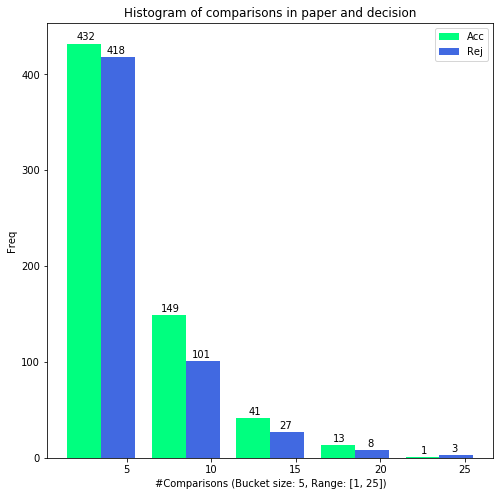

In [104]:
fig=plt.figure(figsize=(8, 8))

bins = list(range(1, 27, 5))

freq, bins, patches = plt.hist([acc_comps, rej_comps], bins, label=['Acc', 'Rej'], color=["springgreen", "royalblue"])
plt.legend(loc='upper right')

bin_centers = np.diff(bins)*0.5 + bins[:-1]

# Acc
n = 0
for fr, x, patch in zip(freq[0], bin_centers, patches[0]):
    height = int(fr)
    plt.annotate("{}".format(height),
                 xy = (x-0.9, height+1.3),             # top left corner of the histogram bar
                 xytext = (0,0.2),             # offsetting label position above its bar
                 textcoords = "offset points", # Offset (in points) from the *xy* value
                 ha = 'center', va = 'bottom')
    n = n+1

# Rej
n = 0
for fr, x, patch in zip(freq[1], bin_centers, patches[1]):
    height = int(fr)
    plt.annotate("{}".format(height),
                 xy = (x+0.9, height+1.3),             # top left corner of the histogram bar
                 xytext = (0,0.2),             # offsetting label position above its bar
                 textcoords = "offset points", # Offset (in points) from the *xy* value
                 ha = 'center', va = 'bottom')
    n = n+1

plt.title('Histogram of comparisons in paper and decision')
plt.xlabel("#Comparisons (Bucket size: 5, Range: [1, 25])")
plt.ylabel("Freq")
plt.savefig("plots/hist_comp_dec.png")
plt.show()

# mediumblue, lime, green

In [97]:
mkdir plots

In [58]:
plt.hist??

## Find old iclr paper count

In [13]:
iclr_total_nodes_count = 0

for i in nodes_load_again["id"]:
    venue = None
    if i in st_node_venue_labels:
        venue = st_node_venue_labels[i]
    elif i in st_pure_iclr_nodes:
        venue = "iclr"
    else:
        venue = "oth"
    
    if venue == "iclr":
        iclr_total_nodes_count += 1

In [14]:
iclr_total_nodes_count

1248

In [16]:
len(st_pure_iclr_nodes)

1193

In [17]:
1248-1193

55